# Number of startups in Banglore,New Delhi,Gurgaon,Noida and Mumbai

Bangalore 637
Mumbai 449
New Delhi 389
Gurgaon 241
Noida 79
Maximum startups are in  Bangalore with totalcount of  637


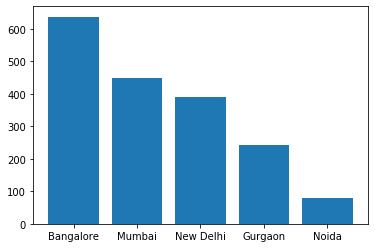

In [5]:
import operator
import csv
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt
startup=csv.DictReader(open('startup_funding.csv'),skipinitialspace=True)
location={}
#foreign=['California','Houston','Us','Usa','Boston','London','Palo alto','Seattle','New York','Dallas','Singapore','Sfo','Bangkok','San mateo','California','Dubai','Ny','Uk']
preferred=['Bangalore','New Delhi','Gurgaon','Noida','Mumbai']
for row in startup:
    sloc=row['CityLocation']
    if('/' in sloc):
        slocl=sloc.split("/") 
        for i in slocl:
            i=i.strip()
            i=i.title()
            if(i=='Delhi'):
                i='New Delhi'
            if i in preferred:
                location[i]=location.get(i,0)+1
    else:
        sloc=sloc.strip()
        sloc=sloc.title()
        if(sloc=='Delhi'):
            sloc='New Delhi'
        if(sloc in preferred):
            location[sloc]=location.get(sloc,0)+1
location1=dict(sorted(location.items(), key=operator.itemgetter(1),reverse=True))
j=0
l=[]
v=[]
for i in location1.keys():
    if(j<10):
        print(i,location1[i])
        l.append(i)
        v.append(location1[i])
        j=j+1
print("Maximum startups are in ",l[0],'with totalcount of ',v[0])
plt.bar(l,v)
plt.show()

# Top Investors and their total numbe rof Investment

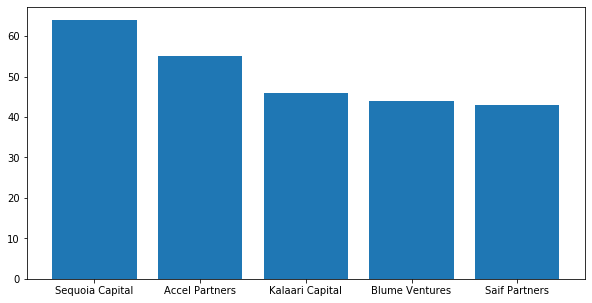

Sequoia Capital Accel Partners Kalaari Capital Blume Ventures Saif Partners
64 55 46 44 43


In [6]:
import operator
import csv
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt
import pandas as pd
startup=pd.read_csv("startup_funding.csv",encoding='ISO-8859-1',skipinitialspace=True)
startup['InvestorsName'].fillna('Undisclosed',inplace=True)
startup['InvestorsName']=startup['InvestorsName'].apply(lambda x: str(str(x).replace(' and ',',')) )
startup['InvestorsName']=startup['InvestorsName'].apply(lambda x: str(str(x).replace(u'\xa0', u' ')) )
investors={}
for i,rows in startup.iterrows():
    k=rows.InvestorsName
    if("undisclosed" in k or "Undisclosed" in k or k=='' or 'unnamed' in k or 'Unnamed' in k):
        continue
    else:
        if(',' in k):
            klist=k.split(",")
            for i in klist:
                i=i.strip()
                i=i.lower()
                i=i.title()
                if (' & Others' in k and k !=''):
                    investors[i]=investors.get(i,0)+1 
                else:
                    x=i.split(' & ')
                    for j in x:
                        j=j.strip()
                        j=j.lower()
                        j=j.title()
                        if(j!=''):
                            investors[j]=investors.get(j,0)+1
                
        else:
            i=k.strip()
            i=i.lower()
            i=i.title()
            if(i!=''):
                investors[i]=investors.get(i,0)+1
investors=dict(sorted(investors.items(),key=operator.itemgetter(1),reverse=True))
investorlist=[]
numberofinvestment=[]
j=0
for k in investors.keys():
    if(j<5):
        investorlist.append(k)
        numberofinvestment.append(investors[k])
        j=j+1
plt.figure(figsize=(10,5))
plt.bar(investorlist,numberofinvestment)
plt.show()
print(*investorlist)
print(*numberofinvestment)


# Top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company

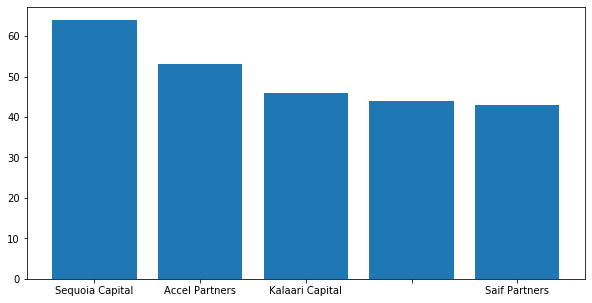

Sequoia Capital Accel Partners Kalaari Capital  Saif Partners
64 53 46 44 43


In [7]:
import pandas as pd
import numpy as np
import operator
import matplotlib.pyplot as plt
data=pd.read_csv('startup_funding.csv',encoding='ISO-8859-1',skipinitialspace=True)
data['StartupName'].replace('Olacabs','Ola',inplace=True)
data['StartupName'].replace('Ola cabs','Ola',inplace=True)
data['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
data['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
data['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
data['StartupName'].replace('Oyorooms','Oyo',inplace=True)
data['StartupName'].replace('OyoRooms','Oyo',inplace=True)
data['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
data['InvestorsName'].fillna('Undisclosed',inplace=True)
data['InvestorsName']=data['InvestorsName'].apply(lambda x: str(str(x).replace(' and ',',')) )
data['InvestorsName']=data['InvestorsName'].apply(lambda x: str(str(x).replace(u'\xa0', u' ')) )
investors={}
for i,rows in data.iterrows():
    k=rows.InvestorsName
    if("undisclosed" in k or "Undisclosed" in k or k=='' or 'unnamed' in k or 'Unnamed' in k):
        continue
    elif(','  not in k):
        k=k.strip()
        k=k.lower()
        k=k.title()
        investors[k]=investors.get(k,0)+1
    else:
        s=set()
        klist=k.split(',')
        for j in klist:
            j=j.strip()
            j=j.lower()
            j=j.title()
            if(' & Others' in  j or j!=''):
                s.add(j)
            else:
                x=j.split(' & ')
                for j in x:
                    j=j.strip()
                    j=j.lower()
                    j=j.title()
                    s.add(j)
        for d in s:
            if('undisclosed' in d or 'Undisclosed' in d):
                pass
            else:
                investors[d]=investors.get(d,0)+1
investors=dict(sorted(investors.items(),key=operator.itemgetter(1),reverse=True))
investorlist=[]
numberofinvestment=[]
j=0
for k in investors.keys():
    if(j<5):
        investorlist.append(k)
        numberofinvestment.append(investors[k])
        j=j+1
plt.figure(figsize=(10,5))
plt.bar(investorlist,numberofinvestment)
plt.show()
print(*investorlist)
print(*numberofinvestment)

#  Top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding

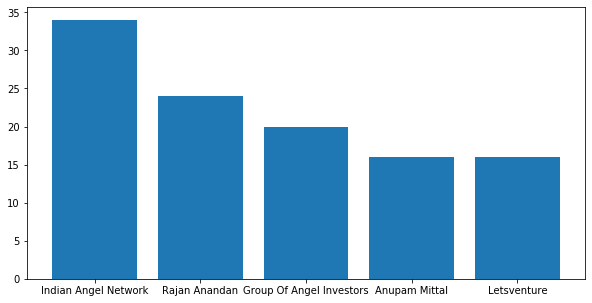

Indian Angel Network Rajan Anandan Group Of Angel Investors Anupam Mittal Letsventure
34 24 20 16 16


In [8]:
import operator
import math
import csv
import numpy as np
from collections import OrderedDict
import pandas as pd
import matplotlib.pyplot as plt

startup=pd.read_csv(open('startup_funding.csv'),skipinitialspace=True,encoding='ISO-8859-1')
startup['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
startup['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
startup['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
startup['InvestmentType'].replace('DebtFunding','Debt Funding',inplace=True)
startup['StartupName'].replace('Olacabs','Ola',inplace=True)
startup['StartupName'].replace('Ola cabs','Ola',inplace=True)
startup['StartupName'].replace('Flipkart.com','Flipkart',inplace=True)
startup['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True)
startup['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
startup['StartupName'].replace('Oyorooms','Oyo',inplace=True)
startup['StartupName'].replace('OyoRooms','Oyo',inplace=True)
startup['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
startup['InvestorsName'].fillna('Undisclosed',inplace=True)
startup['InvestorsName']=startup['InvestorsName'].apply(lambda x: str(str(x).replace(' and ',',')) )
startup['InvestorsName']=startup['InvestorsName'].apply(lambda x: str(str(x).replace(u'\xa0', u' ')) )
investors={}
for i,rows in startup.iterrows():
    t=rows.InvestmentType
    if(t=='Crowd Funding' or t=='Seed Funding'):
        k=rows.InvestorsName
        if("undisclosed" in k or "Undisclosed" in k or k=='' or 'unnamed' in k or 'Unnamed' in k):
            continue
        elif(','  not in k):
            k=k.strip()
            k=k.lower()
            k=k.title()
            investors[k]=investors.get(k,0)+1
        else:
            s=set()
            klist=k.split(',')
            for j in klist:
                j=j.strip()
                j=j.lower()
                j=j.title()
                if(' & Others' in  j or j!=''):
                    s.add(j)
                else:
                    x=j.split(' & ')
                    for j in x:
                        j=j.strip()
                        j=j.lower()
                        j=j.title()
                        s.add(j)
            for d in s:
                if('undisclosed' in d or 'Undisclosed' in d or d==''):
                    continue
                else:
                    investors[d]=investors.get(d,0)+1
investors=dict(sorted(investors.items(),key=operator.itemgetter(1),reverse=True))
investorlist=[]
numberofinvestment=[]
j=0
for k in investors.keys():
    if(j<5):
        investorlist.append(k)
        numberofinvestment.append(investors[k])
        j=j+1
plt.figure(figsize=(10,5))
plt.bar(investorlist,numberofinvestment)
plt.show()
print(*investorlist)
print(*numberofinvestment)

# question 5

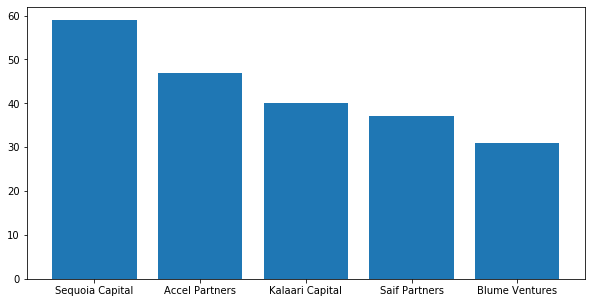

Sequoia Capital Accel Partners Kalaari Capital Saif Partners Blume Ventures
59 47 40 37 31


In [9]:
investors={}
for i,rows in startup.iterrows():
    t=rows.InvestmentType
    if(t=='Private Equity'):
        k=rows.InvestorsName
        if("undisclosed" in k or "Undisclosed" in k or k=='' or 'unnamed' in k or 'Unnamed' in k):
            continue
        elif(','  not in k):
            k=k.strip()
            k=k.lower()
            k=k.title()
            investors[k]=investors.get(k,0)+1
        else:
            s=set()
            klist=k.split(',')
            for j in klist:
                j=j.strip()
                j=j.lower()
                j=j.title()
                if(' & Others' in  j or j!=''):
                    s.add(j)
                else:
                    x=j.split(' & ')
                    for j in x:
                        j=j.strip()
                        j=j.lower()
                        j=j.title()
                        s.add(j)
            for d in s:
                if('undisclosed' in d or 'Undisclosed' in d or d==''):
                    continue
                else:
                    investors[d]=investors.get(d,0)+1
investors=dict(sorted(investors.items(),key=operator.itemgetter(1),reverse=True))
investorlist=[]
numberofinvestment=[]
j=0
for k in investors.keys():
    if(j<5):
        investorlist.append(k)
        numberofinvestment.append(investors[k])
        j=j+1
plt.figure(figsize=(10,5))
plt.bar(investorlist,numberofinvestment)
plt.show()
print(*investorlist)
print(*numberofinvestment)